In [10]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import datetime
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [120]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2023, 6, 20)

In [121]:
petr4 = web.get_data_yahoo('PETR4.SA',start,end) #Petrobrás
abev3 = web.get_data_yahoo('ABEV3.SA',start,end) #Ambev
usim5 = web.get_data_yahoo('USIM5.SA',start,end) #Usiminas
ibov = web.get_data_yahoo('^BVSP',start,end) #Ibovespa
embr3 = web.get_data_yahoo('EMBR3.SA',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
petr4.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,36.95,37.32,36.82,37.32,11.54,13303600
2010-01-05,37.38,37.43,36.80,37.00,11.44,21396400


In [102]:
petr4.loc['2019-06-01':'2019-06-30'].head(2)

,Open,High,Low,Close,Adj Close,Volume,media_close,vol_std_close_15d,mean_vol_str_close,vol_std_close,mean_vol_close,mean_vol_close_15d,diff_mean
Date,,,,,,,,,,,,,
2019-06-03,25.88,26.32,25.85,25.99,10.02,53470600,19.31,0.54,1.09,0.76,0.94,0.66,0.28
2019-06-04,26.29,26.37,26.03,26.20,10.11,37331100,19.31,0.54,1.09,0.74,0.94,0.66,0.28


#### Gerando gráficos

In [122]:
def plot_stock(df, stock_name):
    plt.rcParams["figure.figsize"] = [14,5]
    plt.plot(df.index, df['Close'])    
    plt.xlabel('Data')
    plt.ylabel('Valor (R$)')
    plt.title(stock_name)

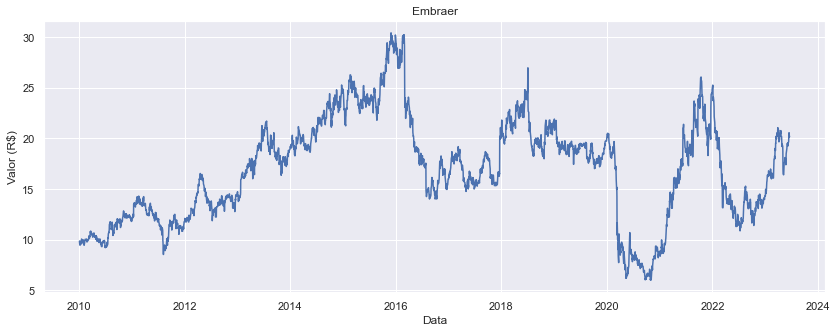

In [123]:
plot_stock(embr3, 'Embraer')

<AxesSubplot:xlabel='Date'>

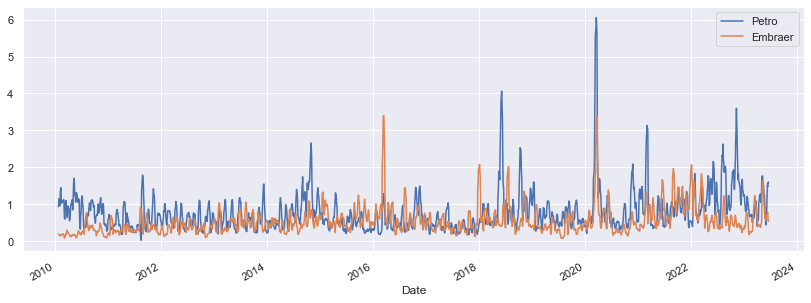

In [124]:
petr4['Close'].rolling(15).std().plot(legend=True, label='Petro')
embr3['Close'].rolling(15).std().plot(legend=True, label='Embraer')


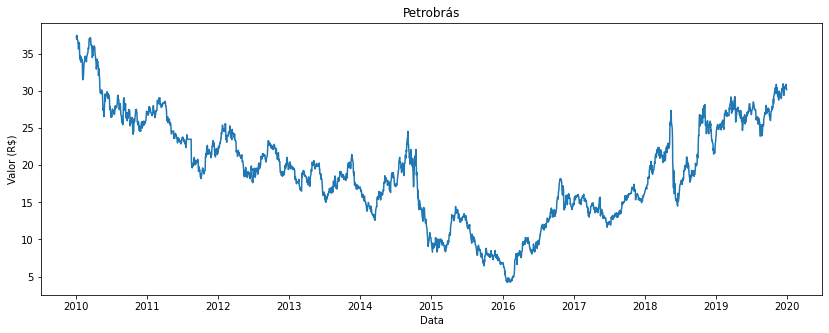

In [20]:
plot_stock(petr4, 'Petrobrás')

<AxesSubplot:xlabel='Date'>

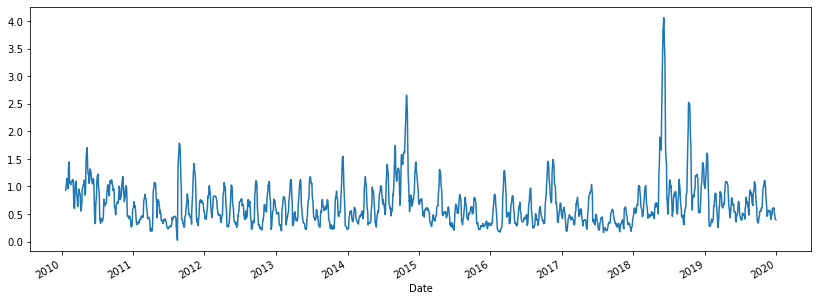

In [27]:
petr4['Close'].rolling(15).std().plot()

In [29]:
petr4['media_close'] = petr4['Close'].mean()

<AxesSubplot:xlabel='Date'>

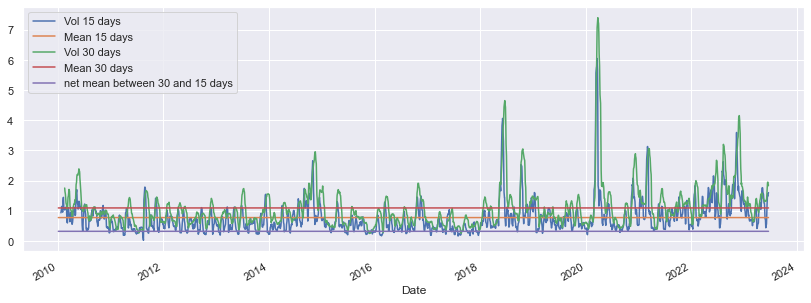

In [125]:
days = 30
petr4['vol_std_close'] = petr4['Close'].rolling(days).std()
petr4['mean_vol_close'] = petr4['vol_std_close'].mean()
petr4['vol_std_close_15d'] = petr4['Close'].rolling(15).std()
petr4['mean_vol_close_15d'] = petr4['vol_std_close_15d'].mean()
petr4['diff_mean'] =  petr4['mean_vol_close'] - petr4['mean_vol_close_15d']
petr4['vol_std_close_15d'].plot(legend=True, label='Vol 15 days')
petr4['mean_vol_close_15d'].plot(legend=True, label='Mean 15 days')
petr4['vol_std_close'].plot(legend=True, label='Vol ' + str(days) + ' days')
petr4['mean_vol_close'].plot(legend=True, label='Mean ' + str(days) + ' days')
petr4['diff_mean'].plot(legend=True, label='net mean between ' + str(days) + ' and 15 days')


<AxesSubplot:xlabel='Date'>

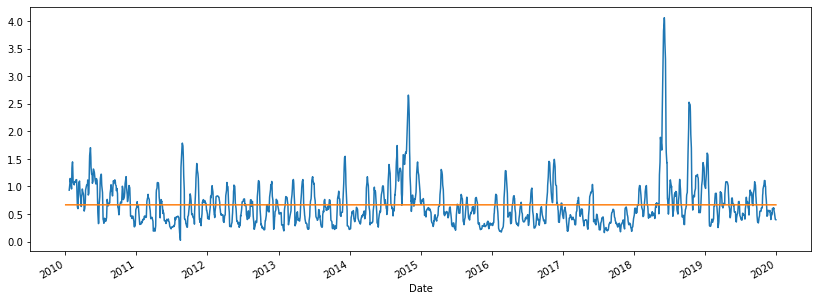

In [33]:
petr4['vol_std_close_15d'].plot()
petr4['mean_vol_str_close'].plot()

In [34]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [39]:
fmri = sns.load_dataset("fmri")
fmri.head(2)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.02
1,s5,14,stim,parietal,-0.08


In [42]:
penguins = sns.load_dataset("penguins")
penguins.head(2)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,Male
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,Female


In [48]:
petr4.dropna(subset=['vol_std_close_15d'], inplace=True)

In [49]:
petr4.head(2)

,Open,High,Low,Close,Adj Close,Volume,media_close,vol_std_close_15d,mean_vol_str_close
Date,,,,,,,,,
2010-01-22,34.11,34.80,34.06,34.75,10.75,19025100,19.31,0.93,0.67
2010-01-26,34.29,34.34,33.65,33.90,10.48,20281200,19.31,1.07,0.67


In [45]:
petr4.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2480, freq=None)

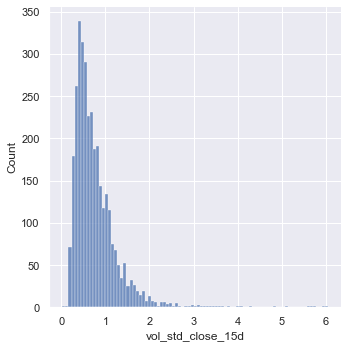

In [126]:
# Plot the responses for different events and regions
sns.displot(data=petr4, x='vol_std_close_15d')

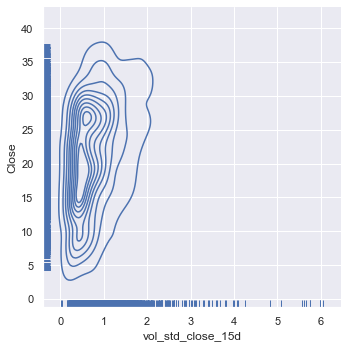

In [127]:
sns.displot(data=petr4, x="vol_std_close_15d", y="Close", kind="kde", rug=True)

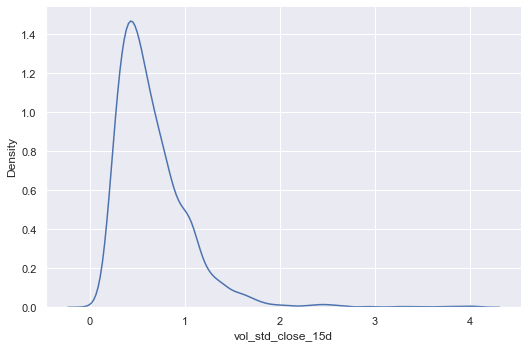

In [68]:
sns.displot(data=petr4, x="vol_std_close_15d", kind ="kde", 
height=5, aspect=1.5)

In [30]:
petr4.head(3)

,Open,High,Low,Close,Adj Close,Volume,media_close
Date,,,,,,,
2010-01-04,36.95,37.32,36.82,37.32,11.54,13303600,19.31
2010-01-05,37.38,37.43,36.80,37.00,11.44,21396400,19.31
2010-01-06,36.80,37.50,36.80,37.50,11.60,18720600,19.31


In [3]:
#pip install pandas_datareader 

In [7]:
from pandas_datareader import data as web

prices = pd.DataFrame()
tickers = ['ITUB3.SA', 'BBDC3.SA', 'BBAS3.SA', 'SANB3.SA']

In [8]:
for i in tickers:
    prices[i] = web.get_data_yahoo(i,'01/01/2008')['Adj Close']

TypeError: string indices must be integers

In [4]:
prices.rename(columns ={'ITUB3.SA':'ITUB', 'BBDC3.SA':'BBDC','BBAS3.SA':'BBAS','SANB3.SA':'SANB', '^BVSP':'IBOV'},inplace = True)
prices['IBOV'] = prices['IBOV']/1000
prices.reset_index(inplace = True)
prices.dropna(subset = ['IBOV'], inplace = True)

TypeError: string indices must be integers